In [2]:
import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import nibabel as nib

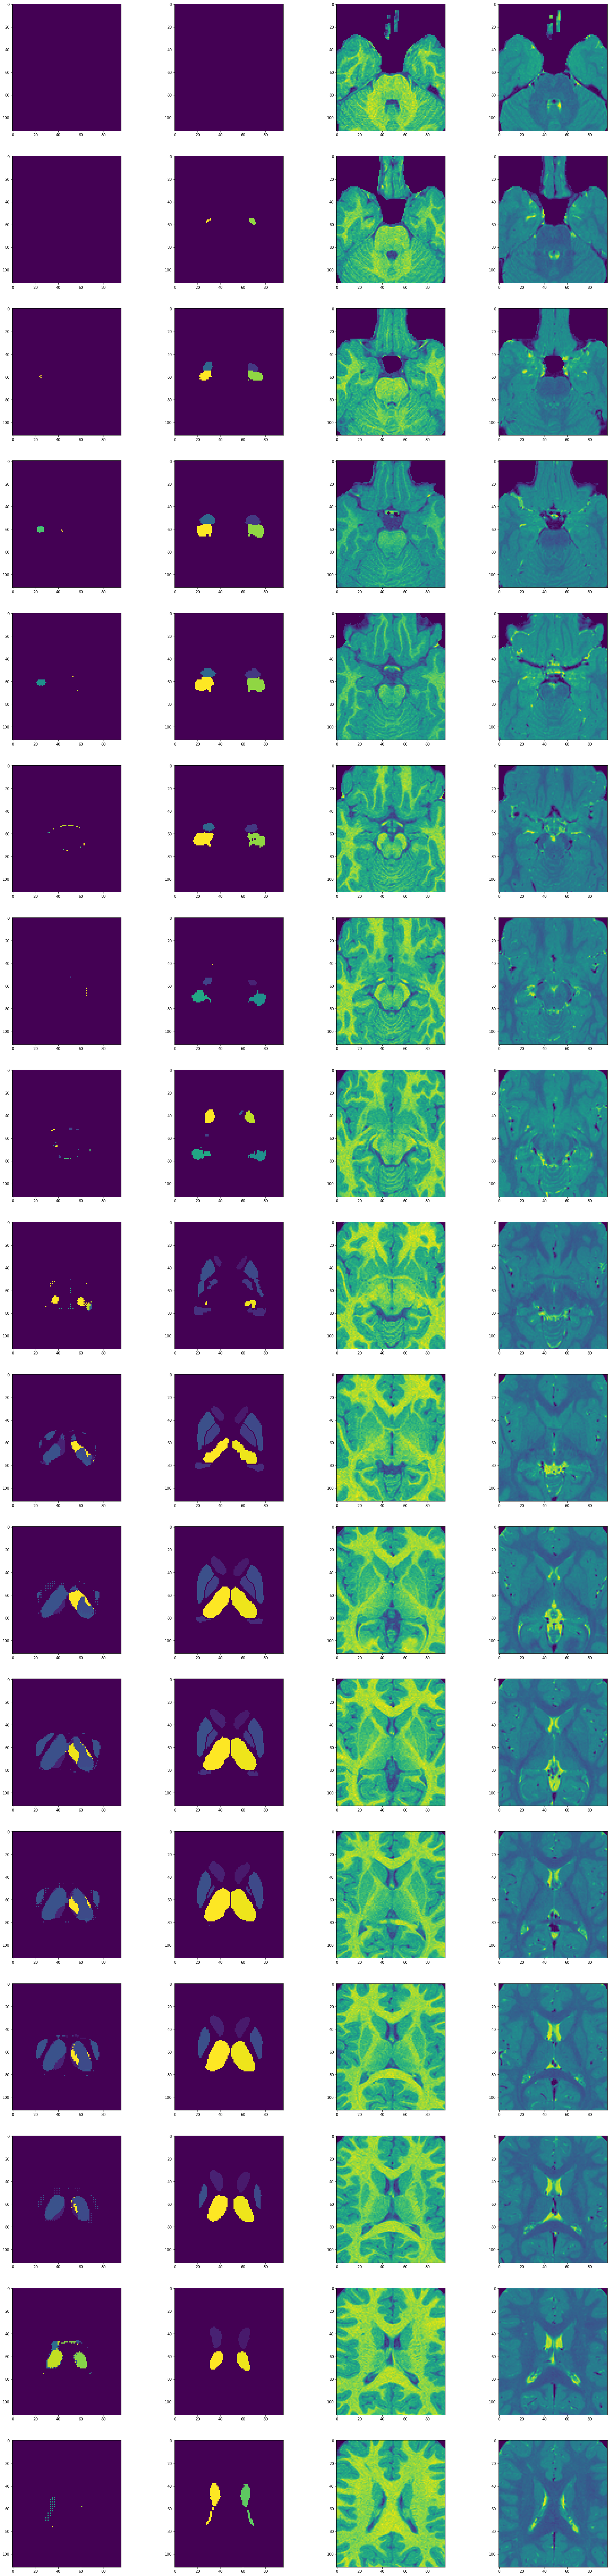

In [31]:
inf_dir = '/proj/NIRAL/users/hanwang/model_1031/inference/'

data_dir = '/proj/NIRAL/users/hanwang/trainingData-rightSize/'

subject_ID = '376852_V24'
inf_pre = ''
inf_suf = '_niftynet_out.nii.gz'
seg_pre = 'label_'
seg_suf = '_t1w.nrrd'
T1_pre = 'atlas_'
T1_suf = '_t1w.nrrd'
T2_pre = 'atlas_'
T2_suf = '_t2w.nrrd'

inf_path = inf_dir + inf_pre + subject_ID + inf_suf
seg_path = data_dir + seg_pre + subject_ID + seg_suf
T1_path = data_dir + T1_pre + subject_ID + T1_suf
T2_path = data_dir + T2_pre + subject_ID + T2_suf

inf = sitk.GetArrayFromImage(sitk.ReadImage(inf_path)).squeeze()
seg = sitk.GetArrayFromImage(sitk.ReadImage(seg_path)).squeeze()
T2 = sitk.GetArrayFromImage(sitk.ReadImage(T2_path)).squeeze()
T1 = sitk.GetArrayFromImage(sitk.ReadImage(T1_path)).squeeze()

i = 70
js = np.arange(20,70,3)
jlength = len(js)

f,axes = plt.subplots(jlength,4,figsize=(30,int(30*jlength/4)))

for i in np.arange(jlength): 
    axes[i][0].imshow(inf[js[i],:,:])
    axes[i][1].imshow(seg[js[i],:,:])
    axes[i][2].imshow(T1[js[i],:,:])
    axes[i][3].imshow(T2[js[i],:,:])

In [34]:
import sklearn as skl
c_mat = skl.metrics.confusion_matrix(seg.flatten(),inf.flatten())
p_mat = c_mat.T / c_mat.astype(np.float).sum(axis=1)

In [46]:
np.where(seg==11)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [44]:
c_mat.astype(np.float).sum(axis=1)

array([990817.,   1026.,   1025.,   3776.,   3772.,   2959.,   2956.,
         1210.,   1208.,   4779.,   4785.,      0.,   6939.,   6940.])

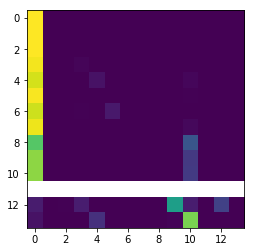

In [49]:
plt.imshow(p_mat.T)

In [52]:
np.where(np.logical_and(inf==10,seg==8))

(array([43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46,
        46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
        51, 

In [42]:
np.set_printoptions(precision=1)
p_mat.T * 100

array([[1.0e+02, 1.0e-03, 2.2e-02, 3.9e-03, 5.9e-02, 1.1e-03, 6.4e-03,
        1.3e-02, 4.0e-04, 2.5e-02, 1.2e-01, 3.0e-04, 9.7e-03, 2.0e-04],
       [1.0e+02, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+02, 0.0e+00, 9.8e-02, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 2.0e-01, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [9.8e+01, 0.0e+00, 2.4e-01, 1.5e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.3e-01, 0.0e+00, 5.3e-02, 0.0e+00, 2.6e-02, 0.0e+00, 0.0e+00],
       [9.3e+01, 0.0e+00, 0.0e+00, 0.0e+00, 5.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 1.7e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [9.9e+01, 0.0e+00, 0.0e+00, 2.0e-01, 0.0e+00, 0.0e+00, 3.4e-02,
        6.8e-02, 0.0e+00, 1.7e-01, 4.7e-01, 0.0e+00, 0.0e+00, 0.0e+00],
       [9.2e+01, 0.0e+00, 0.0e+00, 5.8e-01, 1.7e-01, 6.9e+00, 0.0e+00,
        3.4e-02, 0.0e+00, 0.0e+00, 1.4e-01, 0.0e+00, 0.0e+00, 0.0e+00],

In [7]:
np.set_printoptions(threshold=np.inf)
np.where(seg>0)[0]

array([22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25

In [51]:
eq_mask = np.logical_and(inf==seg,seg!=0)
np.where(np.logical_and(seg==8,eq_mask))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [21]:
np.set_printoptions(threshold=1e4)
np.where(eq_mask)

(array([40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
        41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
        42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
        42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
        45, 

In [ ]:
m = sitk.ReadImage(inf_path)
a = sitk.GetArrayFromImage(m)
a.shape